# Introduction

[Ollama](https://ollama.com/) is an open soruce software tool that makes it easy to download and host various large language models (LLMs). 

This LLM notebook image has the Ollama software pre-installed, so no download necessary. However, we will need to start it so we can query it from this notebook as well as download a model.

This quick start notebook will walk you through:

1. Starting Ollama
2. Downloading the llama3 8b model
3. Using the OpenAI API to query the llama3 model
4. Formatting the output for reabability

# Start Ollama

Use the "**+**" button above to open a new **Launcher** tab. On the **Launcher**, select **Terminal**.

<div>
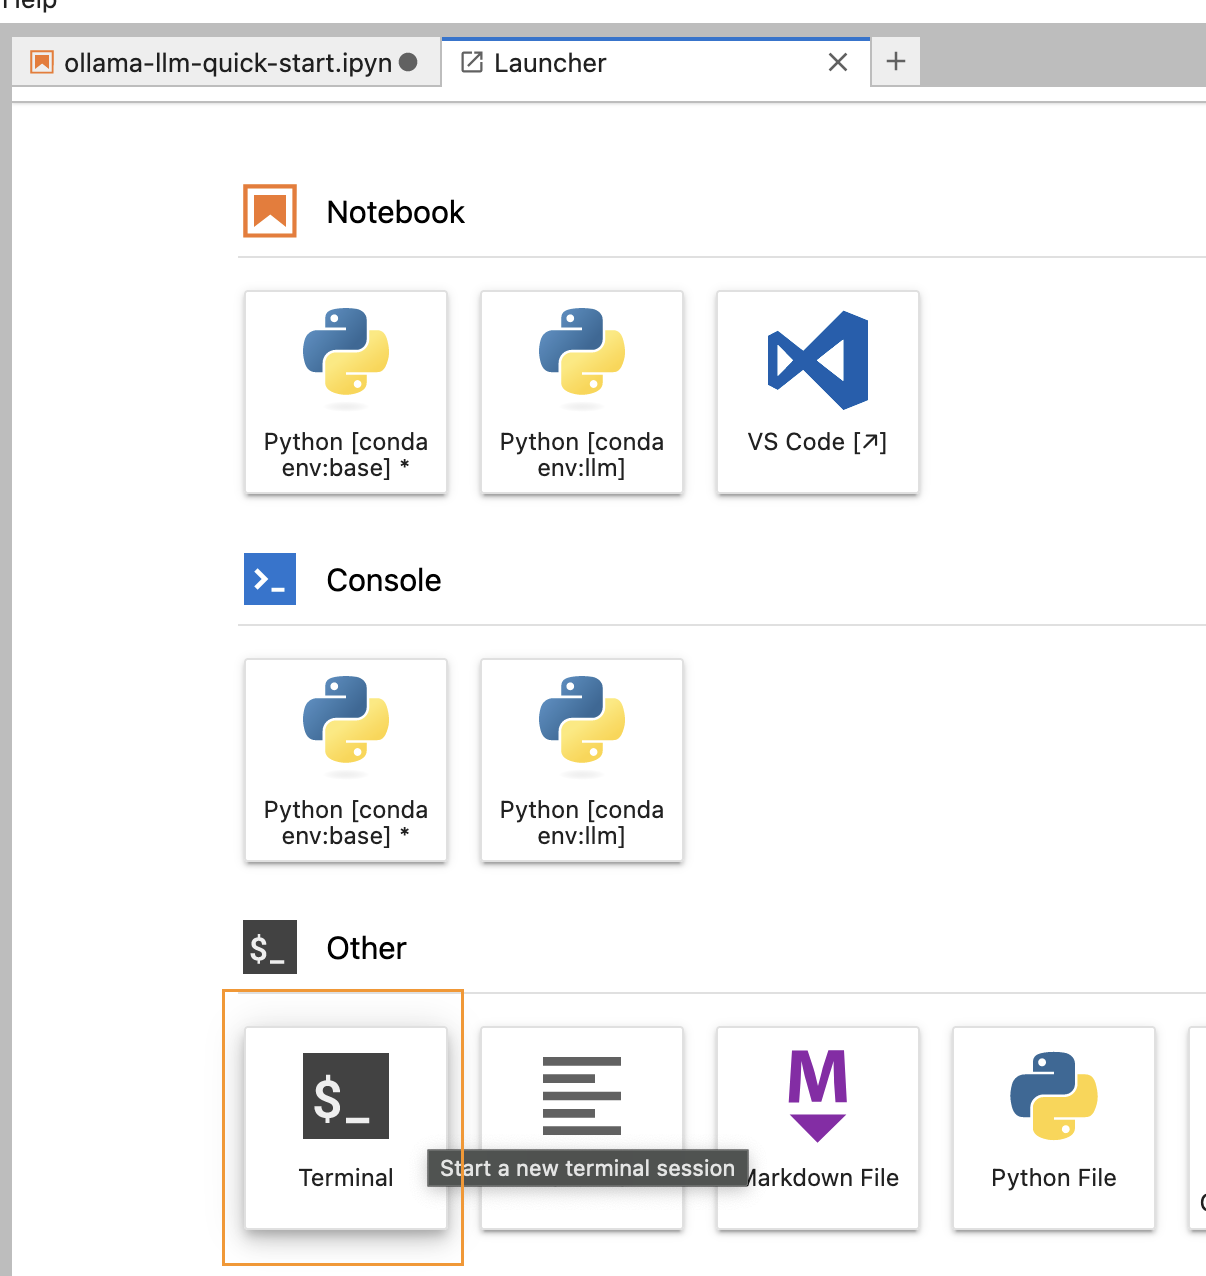
</div>

A new Terminal tab will open.

Enter the following command into the Terminal to start the Ollama process so we're able to query it within this Notebook.

```
ollama serve
```

After running the *ollama serve* command, you should see bunch of output letting you know Ollama is running.

<div>
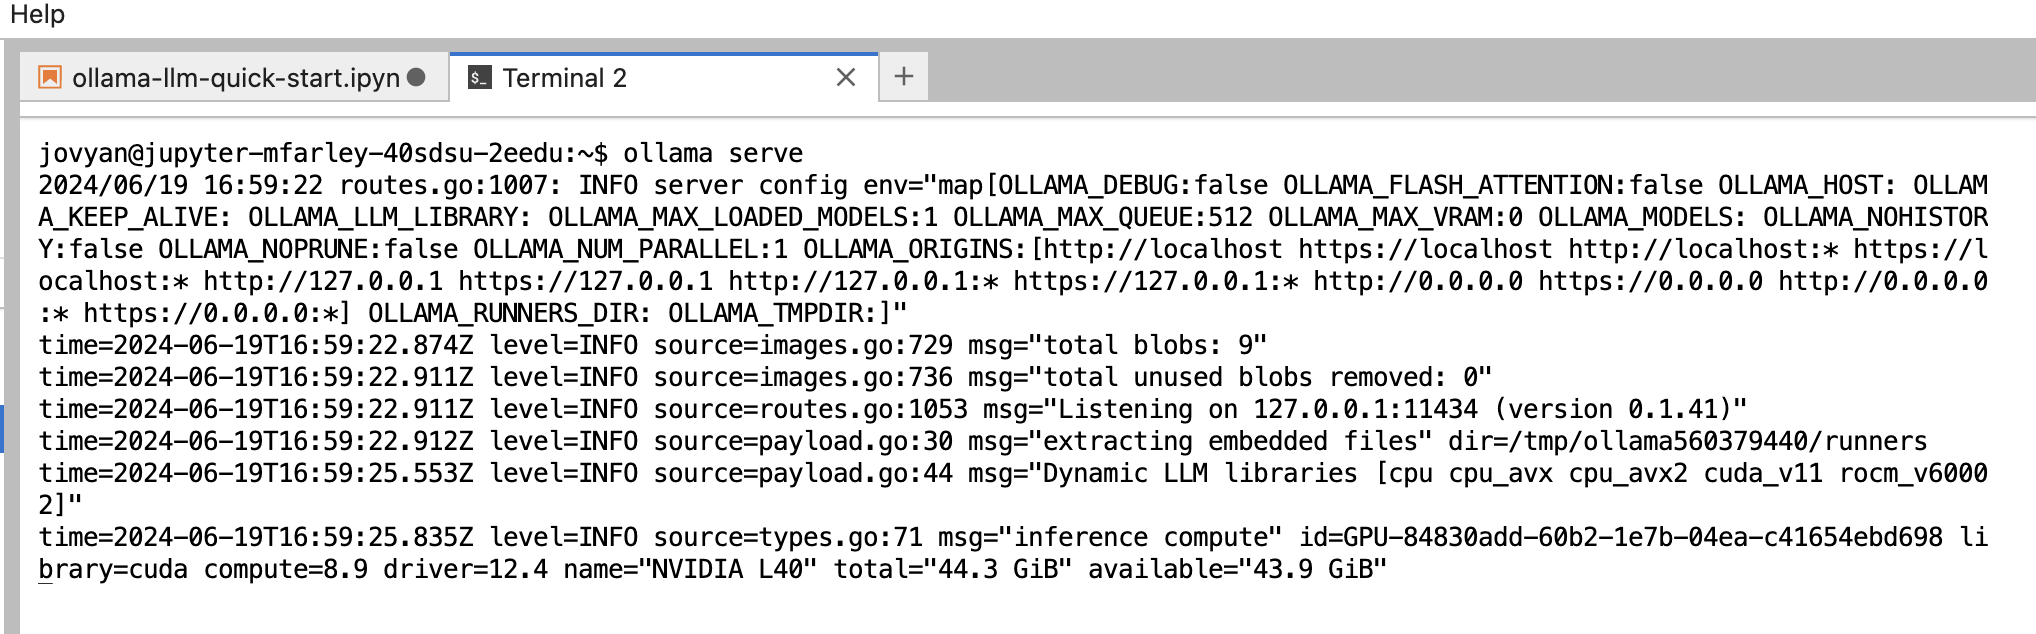
</div>

# Download Model

Ollama makes it easy to download various [open-soruce LLM models](https://ollama.com/library) of various sizes. For this example we're going to use the llama3 8B model, which is around 4.7 GB in size.

The code block below needs to be run. Enter the code block and use the run button to execute the code block. This code block is actually excuting a system command (like you did with ollama serve) which will tell Ollama to download the llama3 8B model.

**Note:** It could take several minutes for the download to complete. You should see a "success" printed as the last step.

In [ ]:
# Run this code block
!ollama pull llama3

# OpenAI API

The next code block will import the OpenAI API for Python so we can use it to query [Ollama OpenAI API](https://github.com/ollama/ollama/blob/main/docs/openai.md) compatible endpoint. Ollama also offers [its own API](https://github.com/ollama/ollama/blob/main/docs/api.md) which has additional features. The nice part about using OpenAI API is we can easily switch between different model providers, such as OpenAI, Azure OpenAI Services, FastChat, etc...

In [ ]:
# Run this clode block; note there will be no output
from openai import OpenAI

## The next code will use the OpenAI API to call Ollama and ask it a question using the llama3 model.

**Note:** The first time you run a code block the model must be load from disk onto the GPUS VRAM. This process can take several minutes. Susequent calls are faster once the model is cached on the GPU.

In [ ]:
# Run this code block
client = OpenAI(
    base_url = 'http://localhost:11434/v1',
    api_key='ollama', # required, but unused
)

response = client.chat.completions.create(
  model="llama3",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "What do you know about the California State University system?"},
  ]
)
print(response.choices[0].message.content)

## LLMs are good at taking instructions, and can be asked to return data in a specific format. Try the next example to get a comma separated list of CSUs and their most recent enrollment numbers.

In [ ]:
# Run this code block
response = client.chat.completions.create(
  model="llama3",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Provide a sorted list of the 23 campuses of the California State University system along with their most recent undergraduate and graduate enrollment numbers. Provide this in csv format sorted by campus name."},
  ]
)
print(response.choices[0].message.content)

# Cleaning Up

Once you're done, let's stop the Ollama process and remove the cached models on disk.

In [ ]:
# Run this code block
!pkill ollama
!rm -Rf ~/.ollama/models/